# Exploring SOUTHWEST Flights
## by Mzoon Alwalmani

## Preliminary Wrangling

This document explores a dataset containing detailed information about the US flights in 2008 it has 6,737,141 flights with 21 features.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import time as time
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
Flights = pd.read_csv('Flights.csv')

First, I will take a subset of the data then clean it.

In [3]:
# take a subset of the data - the SOUTHWEST Carrier
SOUTHWEST=Flights[Flights['UniqueCarrier']== 'WN']

In [4]:
SOUTHWEST.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201754 entries, 0 to 6737141
Data columns (total 29 columns):
Year                 1201754 non-null int64
Month                1201754 non-null int64
DayofMonth           1201754 non-null int64
DayOfWeek            1201754 non-null int64
DepTime              1189396 non-null float64
CRSDepTime           1201754 non-null int64
ArrTime              1187334 non-null float64
CRSArrTime           1201754 non-null int64
UniqueCarrier        1201754 non-null object
FlightNum            1201754 non-null int64
TailNum              1192111 non-null object
ActualElapsedTime    1186911 non-null float64
CRSElapsedTime       1201754 non-null float64
AirTime              1186911 non-null float64
ArrDelay             1186911 non-null float64
DepDelay             1189396 non-null float64
Origin               1201754 non-null object
Dest                 1201754 non-null object
Distance             1201754 non-null int64
TaxiIn               1187334 non-

In [5]:
#delete the row with missing values
delete= SOUTHWEST[((SOUTHWEST.DepTime.isnull()) == (SOUTHWEST.ArrTime.isnull())) == False]
SOUTHWEST= pd.concat([SOUTHWEST, delete]).drop_duplicates(keep=False)

In [6]:
#delete the row with missing values
delete= SOUTHWEST[((SOUTHWEST.DepTime.isnull()) == (SOUTHWEST.ActualElapsedTime.isnull())) == False]
SOUTHWEST= pd.concat([SOUTHWEST, delete]).drop_duplicates(keep=False)

In [7]:
# convert to str 
SOUTHWEST.Year = SOUTHWEST.Year.astype(str)
SOUTHWEST.Month = SOUTHWEST.Month.astype(str).str.pad(2, fillchar='0')
SOUTHWEST.DayofMonth = SOUTHWEST.DayofMonth.astype(str).str.pad(2, fillchar='0')

# combine all in one culomn
SOUTHWEST['Date'] = SOUTHWEST[['Year', 'Month', 'DayofMonth']].apply(
    lambda x: ''.join(x.dropna()), axis=1)

# convert to date
SOUTHWEST['Date']= pd.to_datetime(SOUTHWEST['Date'], format= '%Y%m%d',errors='coerce')

In [8]:
# fill with 0's 
SOUTHWEST.DepTime = SOUTHWEST.DepTime.astype(str).str[:-2].str.pad(4, fillchar='0')
SOUTHWEST.ArrTime = SOUTHWEST.ArrTime.astype(str).str[:-2].str.pad(4, fillchar='0')
# remove '.0' from str then fill with 0's 
SOUTHWEST.CRSDepTime = SOUTHWEST.CRSDepTime.astype(str).str.pad(4, fillchar='0')
SOUTHWEST.CRSArrTime = SOUTHWEST.CRSArrTime.astype(str).str.pad(4, fillchar='0')
# replace '2400' with '0000'
SOUTHWEST.DepTime = SOUTHWEST.DepTime.replace('2400', '0000')
SOUTHWEST.ArrTime = SOUTHWEST.ArrTime.replace('2400', '0000')
SOUTHWEST.CRSDepTime = SOUTHWEST.CRSDepTime.replace('2400', '0000')
SOUTHWEST.CRSArrTime = SOUTHWEST.CRSArrTime.replace('2400', '0000')

In [9]:
# convert to time
SOUTHWEST['DepTime']= pd.to_datetime(SOUTHWEST['DepTime'], format= '%H%M',errors='coerce').dt.time
SOUTHWEST['ArrTime']= pd.to_datetime(SOUTHWEST['ArrTime'], format= '%H%M',errors='coerce').dt.time
SOUTHWEST['CRSDepTime']= pd.to_datetime(SOUTHWEST['CRSDepTime'], format= '%H%M',errors='coerce').dt.time
SOUTHWEST['CRSArrTime']= pd.to_datetime(SOUTHWEST['CRSArrTime'], format= '%H%M',errors='coerce').dt.time

In [10]:
#convert to nan to know how many are there
SOUTHWEST.CarrierDelay = SOUTHWEST.CarrierDelay.replace(0.0, np.nan)
SOUTHWEST.WeatherDelay = SOUTHWEST.WeatherDelay.replace(0.0, np.nan)
SOUTHWEST.NASDelay = SOUTHWEST.NASDelay.replace(0.0, np.nan)
SOUTHWEST.SecurityDelay = SOUTHWEST.SecurityDelay.replace(0.0, np.nan)
SOUTHWEST.LateAircraftDelay = SOUTHWEST.LateAircraftDelay.replace(0.0, np.nan)

In [11]:
#delete unuesed columns
SOUTHWEST = SOUTHWEST.drop(['Year','Month','DayofMonth','UniqueCarrier','FlightNum','TailNum','TaxiIn','TaxiOut','Cancelled'], axis=1)

In [12]:
SOUTHWEST.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199269 entries, 0 to 6737141
Data columns (total 21 columns):
DayOfWeek            1199269 non-null int64
DepTime              1186911 non-null object
CRSDepTime           1199269 non-null object
ArrTime              1186911 non-null object
CRSArrTime           1199269 non-null object
ActualElapsedTime    1186911 non-null float64
CRSElapsedTime       1199269 non-null float64
AirTime              1186911 non-null float64
ArrDelay             1186911 non-null float64
DepDelay             1186911 non-null float64
Origin               1199269 non-null object
Dest                 1199269 non-null object
Distance             1199269 non-null int64
CancellationCode     12358 non-null object
Diverted             1199269 non-null int64
CarrierDelay         117195 non-null float64
WeatherDelay         11114 non-null float64
NASDelay             96641 non-null float64
SecurityDelay        1891 non-null float64
LateAircraftDelay    164080 non-null

In [13]:
SOUTHWEST.head()

DayOfWeek   DepTime CRSDepTime   ArrTime CRSArrTime  ActualElapsedTime  \
0          4  20:03:00   19:55:00  22:11:00   22:25:00              128.0   
1          4  07:54:00   07:35:00  10:02:00   10:00:00              128.0   
2          4  06:28:00   06:20:00  08:04:00   07:50:00               96.0   
3          4  09:26:00   09:30:00  10:54:00   11:00:00               88.0   
4          4  18:29:00   17:55:00  19:59:00   19:25:00               90.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay  ... Dest Distance  \
0           150.0    116.0     -14.0       8.0  ...  TPA      810   
1           145.0    113.0       2.0      19.0  ...  TPA      810   
2            90.0     76.0      14.0       8.0  ...  BWI      515   
3            90.0     78.0      -6.0      -4.0  ...  BWI      515   
4            90.0     77.0      34.0      34.0  ...  BWI      515   

   CancellationCode Diverted  CarrierDelay  WeatherDelay  NASDelay  \
0               NaN        0           NaN           NaN       NaN   
1               NaN        0           NaN           NaN       NaN   
2               NaN        0           NaN           NaN       NaN   
3               NaN        0           NaN           NaN       NaN   
4               NaN        0           2.0           NaN       NaN   

   SecurityDelay  LateAircraftDelay       Date  
0            NaN                NaN 2008-01-03  
1            NaN                NaN 2008-01-03  
2            NaN                NaN 2008-01-03  
3            NaN                NaN 2008-01-03  
4            NaN               32.0 2008-01-03  

[5 rows x 21 columns]

In [14]:
SOUTHWEST.to_csv('SOUTHWEST.csv', index=False)

In [2]:
clean_SouthWest = pd.read_csv('SOUTHWEST.csv')

In [3]:
# convert to date
clean_SouthWest['Date']= pd.to_datetime(clean_SouthWest['Date'], format= '%Y-%m-%d',errors='coerce')

In [77]:
# add the difference time between Actual and CRS Elapsed Time
clean_SouthWest['diff']= clean_SouthWest['ActualElapsedTime'] - clean_SouthWest['CRSElapsedTime']
sample=clean_SouthWest.sample(n=100000)

### What is the structure of your dataset?

There are 1,199,269 flights in the dataset with 21 features like the date, time, delay. the data type are datetime64(1), float64(10), int64(3), object(7)

### What is/are the main feature(s) of interest in your dataset?

I'm interested in exploring the variables like what type of delay takes more time. Also,the relationship between the variables 
like DepDelay and ArrDelay, what day has more flights through the months, do the distance has an effect on the dalay

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think I will use most of the variable because my interest is to find the relationships between them.


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest. start with DepDelay

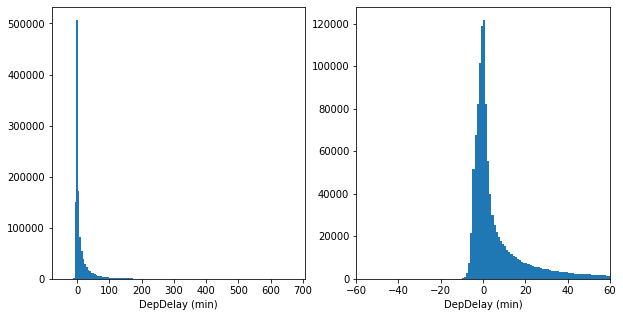

In [90]:
plt.figure(figsize = [10, 5])

plt.subplot(1, 2, 1)
binsize = 5
bins = np.arange(clean_SouthWest['DepDelay'].min()-binsize, clean_SouthWest['DepDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'DepDelay', bins = bins)
plt.xlabel('DepDelay (min)');


plt.subplot(1, 2, 2)
binsize = 1
bins = np.arange(clean_SouthWest['DepDelay'].min()-binsize, clean_SouthWest['DepDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'DepDelay', bins = bins)
plt.xlabel('DepDelay (min)')
plt.xlim(-60, 60);


the Departure Delay has a peak around 0 (no delay) with a lot of values fall between -10 (no delay) to 20. normaly, 
the actual departure time could advance scheduled departure time by few minutes. next DepDelay 

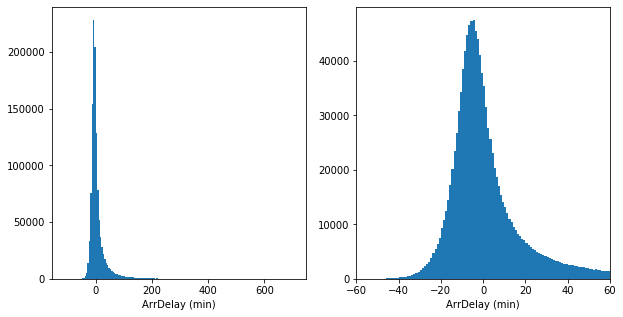

In [89]:
plt.figure(figsize=[10, 5])

plt.subplot(1, 2, 1)
binsize = 5
bins = np.arange(clean_SouthWest['DepDelay'].min()-binsize, clean_SouthWest['ArrDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'ArrDelay', bins = bins)
plt.xlabel('ArrDelay (min)');

plt.subplot(1, 2, 2)
binsize = 1
bins = np.arange(clean_SouthWest['ArrDelay'].min()-binsize, clean_SouthWest['ArrDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'ArrDelay', bins = bins)
plt.xlabel('ArrDelay (min)')
plt.xlim(-60, 60);

the Arrival Delay has a peak around -10 (no delay) with a lot of values fall between -40 (no delay) to 40. 
normaly, the actual arrival time could advance scheduled time 
this is due the few buffer minutes in the scheduled time. next, the five dalay types

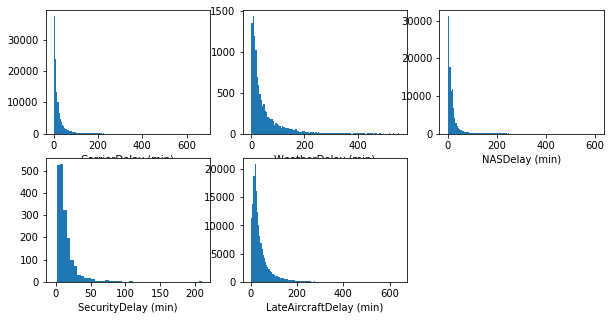

In [100]:
plt.figure(figsize = [10, 5])

plt.subplot(2, 3, 1)
binsize = 5
bins = np.arange(clean_SouthWest['CarrierDelay'].min()-binsize, clean_SouthWest['CarrierDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'CarrierDelay', bins = bins)
plt.xlabel('CarrierDelay (min)');


plt.subplot(2, 3, 2)
binsize = 5
bins = np.arange(clean_SouthWest['WeatherDelay'].min()-binsize, clean_SouthWest['WeatherDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'WeatherDelay', bins = bins)
plt.xlabel('WeatherDelay (min)');


plt.subplot(2, 3, 3)
binsize = 5
bins = np.arange(clean_SouthWest['NASDelay'].min()-binsize, clean_SouthWest['NASDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'NASDelay', bins = bins)
plt.xlabel('NASDelay (min)');


plt.subplot(2, 3, 4)
binsize = 5
bins = np.arange(clean_SouthWest['SecurityDelay'].min()-binsize, clean_SouthWest['SecurityDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'SecurityDelay', bins = bins)
plt.xlabel('SecurityDelay (min)');


plt.subplot(2, 3, 5)
binsize = 5
bins = np.arange(clean_SouthWest['LateAircraftDelay'].min()-binsize, clean_SouthWest['LateAircraftDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'LateAircraftDelay', bins = bins)
plt.xlabel('LateAircraftDelay (min)');

Here are the distributions of the five delay type. 
I can see that the Weather Delay could take more time compared to other delays. next, the months

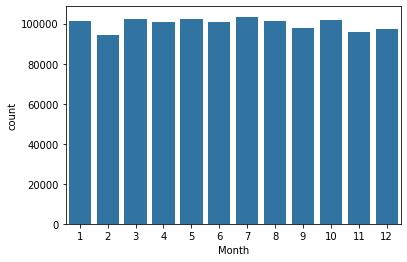

In [83]:
base_color = sb.color_palette()[0]
sb.countplot(data = clean_SouthWest, x = clean_SouthWest['Date'].dt.month, color = base_color)
plt.xlabel('Month');

here is the flights count every month. I can see there is no big difference. next, the origin and distenation

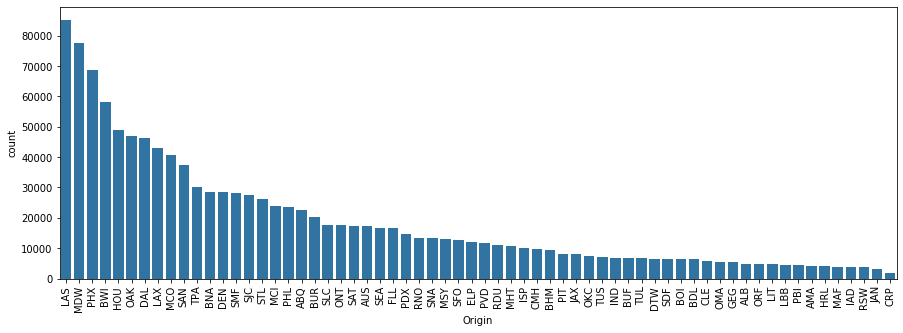

In [86]:
plt.figure(figsize=[15, 5])
base_color = sb.color_palette()[0]
cat_order = clean_SouthWest['Origin'].value_counts().index
sb.countplot(data = clean_SouthWest, x = 'Origin', color = base_color, order = cat_order)
plt.xticks(rotation = 90);

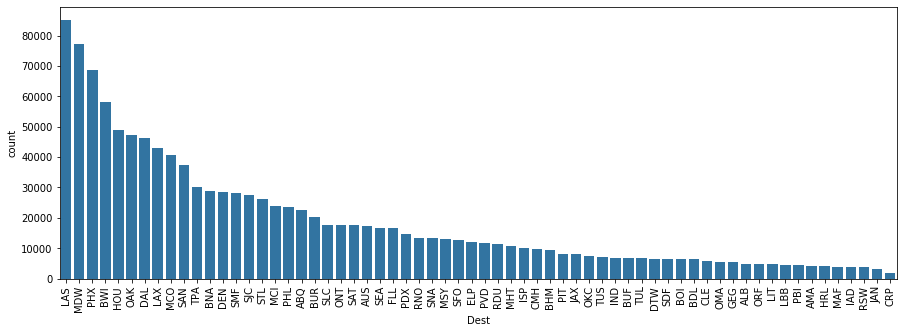

In [82]:
plt.figure(figsize=[15, 5])
base_color = sb.color_palette()[0]
cat_order = clean_SouthWest['Dest'].value_counts().index
sb.countplot(data = clean_SouthWest, x = 'Dest', color = base_color, order = cat_order)
plt.xticks(rotation = 90);

here are the flights count from origins to destination, 
I can see that the distributions are nearly identical,
that because every airplane that go from its airport should return to it.

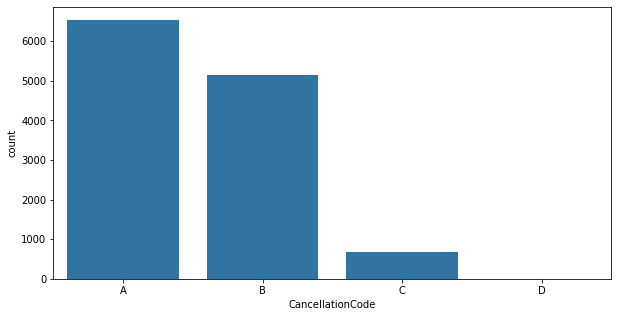

In [91]:
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]
cat_order = clean_SouthWest['CancellationCode'].value_counts().index
sb.countplot(data = clean_SouthWest, x = 'CancellationCode', color = base_color, order = cat_order);

Here are the reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I think every thing is normal i did not perform any transformations. 
I just took a close look to the Departure and Arrival Delay.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I cleaned the data before, I deleted the row that have missing values of delay. 
and I combined some variables to form the date.

## Bivariate Exploration

To start off with, I want to look at the relationship between ArrDelay and DepDelay.

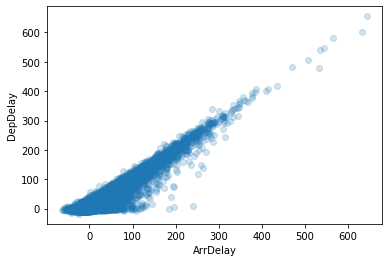

In [93]:
sb.regplot(data = sample, x = 'ArrDelay', y = 'DepDelay', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/5});

here as I can see there is a nearly liner relation between the Arrival and Departuer delay.
Interestingly, when the Departuer time delayed for few minutes it will sometimes result in arrival delay more than the Departuer.
i think this happen when the flight time is small. so, the gates are reserved and the airport did not allocate new gate yet.

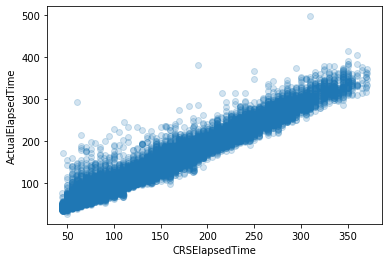

In [84]:
sb.regplot(data = sample, x = 'CRSElapsedTime', y = 'ActualElapsedTime', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/5});

here as I can see there is a liner relation between the CRS and Actual Elapsed Time. 
Interestingly, I think there is around 50 minutes buffer in the CRS Elapsed Time compared 
to the Actual Elapsed Time. so, if the Actual time is less than CRS time the difference will not exceeds one hour.

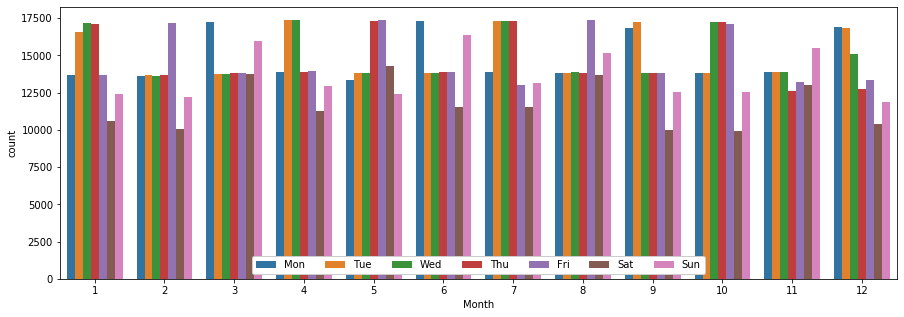

In [55]:
plt.figure(figsize = [15, 5])
ax=sb.countplot(data = clean_SouthWest, x = clean_SouthWest['Date'].dt.month, hue = 'DayOfWeek')
ax.legend(loc = 8, ncol = 7, framealpha = 1, labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Month');

here are the distributions of flights for every day over the months. 
I can see there is actualy a difference in the flight numbers each day.

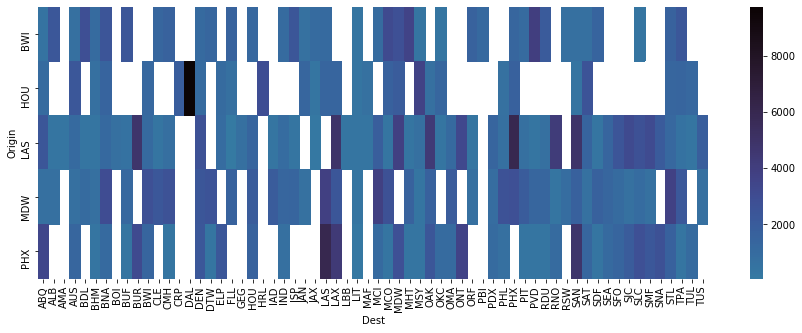

In [70]:
df_count=clean_SouthWest[(clean_SouthWest['Origin']== 'LAS') | 
                         (clean_SouthWest['Origin']== 'MDW') |
                         (clean_SouthWest['Origin']== 'PHX') |
                         (clean_SouthWest['Origin']== 'BWI') |
                         (clean_SouthWest['Origin']== 'HOU')]
df_count=df_count.groupby(["Origin", "Dest"]).size().reset_index(name='count')
df_count = df_count.pivot(index = 'Origin', columns = 'Dest', values = 'count')
plt.figure(figsize = [15, 5])
sb.heatmap(df_count,cmap = 'mako_r',center = 0);

here is a heat map that count the flights number from the top 5 origin (in terms of flights number) to other destnations.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

liner relationship was observed between the Arrival and Departuer delay and CRS and Actual Elapsed Time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There was also an interesting observedion, that when Departuer delayed for few minutes it will sometimes result in arrival delay more than the Departuer. 
i think this happen when the flight time is small. 


## Multivariate Exploration
The main thing I want to explore is my observation which is when
the Departuer time delayed for few minutes it will sometimes result in arrival delay more than the Departuer

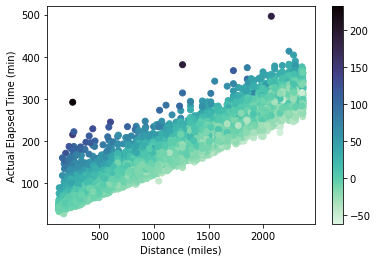

In [87]:
plt.scatter(data = sample, x = 'Distance', y = 'ActualElapsedTime', c = 'diff',
            cmap = 'mako_r');
plt.xlabel('Distance (miles)');
plt.ylabel('Actual Elapsed Time (min)');
plt.colorbar();

here as i can see when the distance is small (that means the flight time is small) 
there are number of blue points which means the diffirence between the Actual and CRS Elapsed Time is big
this could be due delay in Departuer.

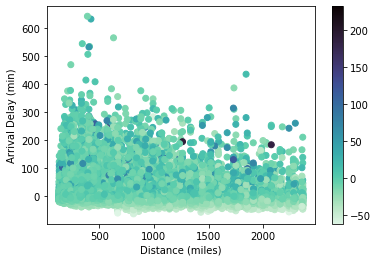

In [99]:
plt.scatter(data = sample, x = 'Distance', y = 'ArrDelay', c = 'diff',
            cmap = 'mako_r');
plt.xlabel('Distance (miles)');
plt.ylabel('Arrival Delay (min)');
plt.colorbar();

here I can see when the distance is small some points in the arrival delay takes large number

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I explore things like what type of delay takes more time and found that it is the weather delay. 
Also,the relationship between the variables like DepDelay and ArrDelay and it is a linear relationship, 
and that in some how the distance has an effect on the Arrival dalay

### Were there any interesting or surprising interactions between features?

the interesting thing hera is when the distence is small the arrival delay tend to be large.